# Time Series Modeling

# A: Research Question

A1: Research Question:

How can we use historical revenue data to forecast future daily revenue trends and identify seasonal patterns?

A2: Data Analysis Goal:

This analysis focuses on understanding historical revenue trends by examining past data to identify significant patterns, trends, and seasonality. By leveraging time series modeling, the analysis aims to predict future revenue for the next quarter, providing valuable insights to support strategic decision-making. Additionally, the study seeks to identify anomalies in revenue, highlighting periods of unusual fluctuations and investigating their underlying causes. Ultimately, the analysis is designed to deliver actionable insights for budget allocation and sales strategy adjustments, ensuring effective planning and informed decision-making based on reliable revenue forecasts.

# B: Method Justification

Time series models rely on several key assumptions to produce accurate forecasts and meaningful insights. A critical assumption is stationarity, where the statistical properties of the time series—such as mean, variance, and autocorrelation—remain constant over time (Hyndman & Athanasopoulos, 2018). This is essential because models like ARIMA depend on consistent relationships within the data. Non-stationary data can lead to unreliable forecasts, but these issues can often be addressed through transformations like differencing, logarithms, or detrending (Hyndman & Athanasopoulos, 2018).

Another key assumption is autocorrelation, which indicates that current values are influenced by past values, revealing dependencies within the data. Autocorrelation is the foundation for many time series models, as it helps identify patterns and relationships over time. Tools such as the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots, as well as the Durbin-Watson statistic, are commonly used to assess and model these dependencies. ACF and PACF plots are particularly useful in guiding the selection of AR (autoregressive) and MA (moving average) terms for ARIMA models (Box et al., 2015).

Understanding and validating these assumptions ensures that the selected time series model effectively captures trends, seasonality, and dependencies, leading to reliable forecasts and actionable insights.

In [1]:
# Import Libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import periodogram
import itertools
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.fftpack import fft
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = '/Users/deadrienhill/codeup-data-science/oneil-clustering-exercises/teleco_time_series .csv'
data = pd.read_csv(file_path)

# C: Data Preparation

C1: Line graph visualizing the realization of the time series

A line graph was generated to visualize the realization of the revenue time series. The graph highlights revenue trends over time, allowing for an initial assessment of patterns such as potential seasonality, trends, or irregular fluctuations. This visualization ensures an intuitive understanding of the data before conducting further analyses. By observing the graph, one can determine whether revenue has consistent trends, spikes, or plateaus, which are critical for subsequent modeling decisions.

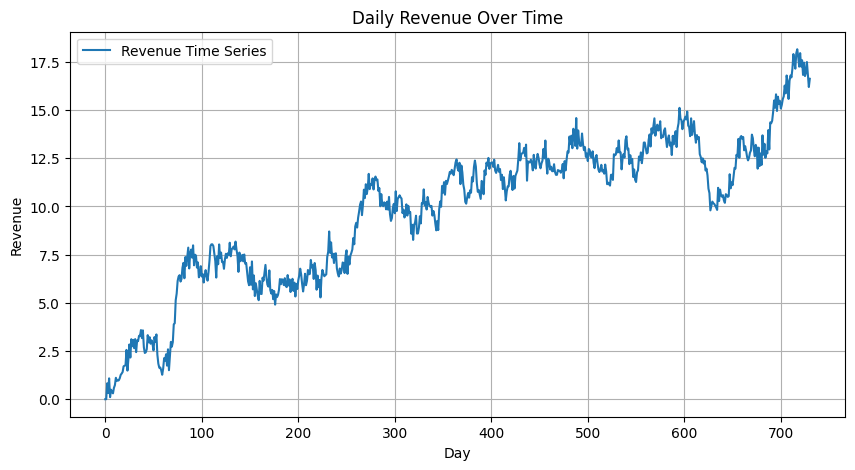

In [3]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(data['Revenue'], label='Revenue Time Series')
plt.title('Daily Revenue Over Time')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

C2: Time step formatting

The time step for this analysis was formatted as a datetime object, ensuring consistent time representation. The dataset consists of daily revenue data, and a check for gaps in the sequence was performed to identify missing dates. A date range was created, and missing dates were determined by comparing the range with the actual timestamps in the dataset. This analysis revealed no gaps in the data, ensuring the continuity of observations for accurate time series modeling. The dataset spans a total of 
731 days, providing sufficient data points for meaningful analysis and reliable forecasts.

In [4]:
# Convert 'Day' to datetime
data['Day'] = pd.to_datetime(data['Day'], unit='D')
data.set_index('Day', inplace=True)

In [5]:
date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
missing_dates = date_range.difference(data.index)
print(f"Missing Dates: {missing_dates}")
if missing_dates.empty:
    print("No gaps in the time series.")


Missing Dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')
No gaps in the time series.


In [6]:
# Length of sequence
print(f"Length of the Time Series: {len(data)}")

Length of the Time Series: 731


C3: Evaluate the stationarity of the time series

The stationarity of the revenue time series was evaluated using the Augmented Dickey-Fuller (ADF) test. Stationarity is a fundamental assumption in time series modeling, as many models require the mean and variance to remain constant over time. The ADF test returned a test statistic and a corresponding p-value. A p-value less than 0.05 indicates stationarity, while a higher p-value suggests non-stationarity. The initial test suggested that the series was not stationary; therefore, differencing was applied to transform the data into a stationary form. The differenced series was then visualized, showing a consistent mean and variance, confirming stationarity after transformation.

In [7]:
# Stationarity test (ADF Test)
result = adfuller(data['Revenue'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary and requires differencing.")

ADF Statistic: -1.9246121573101862
p-value: 0.3205728150793953
The time series is not stationary and requires differencing.


In [8]:
# Split the data into train and test
train, test = train_test_split(data['Revenue'], test_size=0.2, shuffle=False)

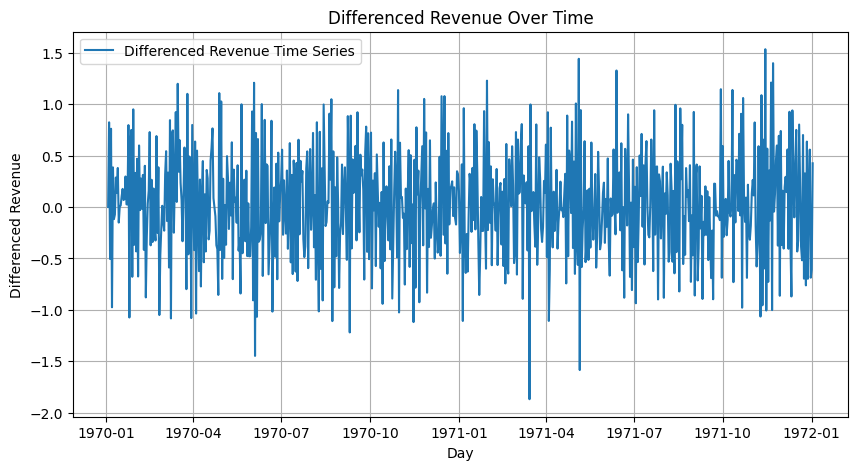

In [9]:
# Differencing the time series to make it stationary
data['Revenue_diff'] = data['Revenue'].diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 5))
plt.plot(data['Revenue_diff'], label='Differenced Revenue Time Series')
plt.title('Differenced Revenue Over Time')
plt.xlabel('Day')
plt.ylabel('Differenced Revenue')
plt.legend()
plt.grid()
plt.show()


C4: Preparation Steps

The data preparation process involved several critical steps to ensure the dataset was ready for time series modeling. First, the Day column was converted into a datetime format and set as the index to facilitate time-based operations. Missing values were checked, though no gaps were found. Next, the data was evaluated for stationarity, and differencing was applied to achieve stationarity. Finally, the dataset was split into training and testing sets. This split ensures that the model can be trained on historical data while being validated on unseen data for robustness.

C5: Copy of Clean Dataset

The cleaned datasets were saved as train_dataset.csv and test_dataset.csv to allow for reproducibility and further analysis. These files contain the preprocessed data with any transformations applied, including differencing to achieve stationarity. By saving these datasets, stakeholders can review the cleaned data and replicate the analysis as needed. The training set includes data points for model development, while the test set is reserved for model validation, ensuring a clear separation between model training and evaluation phases.

In [10]:
# Save cleaned data
train.to_csv('train_dataset.csv', index=True)
test.to_csv('test_dataset.csv', index=True)

print(train)
print(test)

Day
1970-01-02     0.000000
1970-01-03     0.000793
1970-01-04     0.825542
1970-01-05     0.320332
1970-01-06     1.082554
                ...    
1971-08-04    13.938920
1971-08-05    14.052184
1971-08-06    13.520478
1971-08-07    13.082643
1971-08-08    13.504886
Name: Revenue, Length: 584, dtype: float64
Day
1971-08-09    13.684826
1971-08-10    13.152903
1971-08-11    13.310290
1971-08-12    12.665601
1971-08-13    13.660658
                ...    
1971-12-29    16.931559
1971-12-30    17.490666
1971-12-31    16.803638
1972-01-01    16.194813
1972-01-02    16.620798
Name: Revenue, Length: 147, dtype: float64


# D: Model Identification and Analysis

D1: Annotated Findings with visualizations

The decomposition splits the time series into trend, seasonal, and residual components. The seasonal component reflects recurring patterns, the trend shows long-term movements, and the residuals capture noise. Observing the decomposed components allows us to determine if seasonality exists.

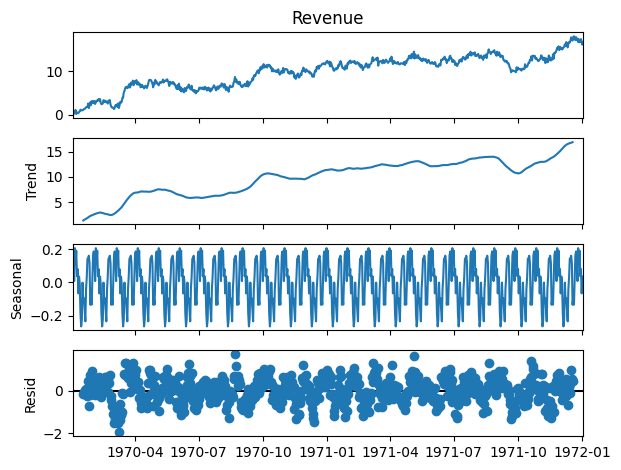

In [11]:
# 1. Decompose the time series
decomposition = seasonal_decompose(data['Revenue'], model='additive', period=30)
decomposition.plot()
plt.show()

Visual inspection of the raw time series can reveal upward or downward trends. Trends might necessitate differencing to achieve stationarity.

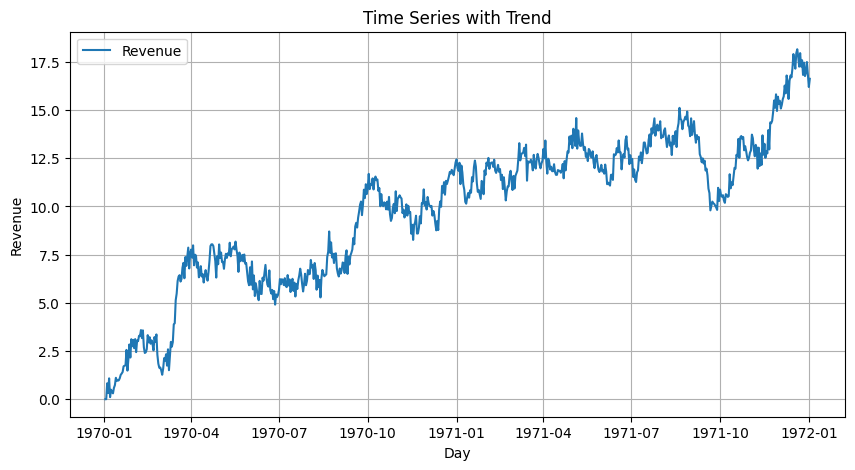

In [12]:
# 2. Trends
plt.figure(figsize=(10, 5))
plt.plot(data['Revenue'], label='Revenue')
plt.title('Time Series with Trend')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

The ACF measures the correlation of the time series with its lagged values. Significant lags indicate patterns or dependencies over time.

<Figure size 1000x500 with 0 Axes>

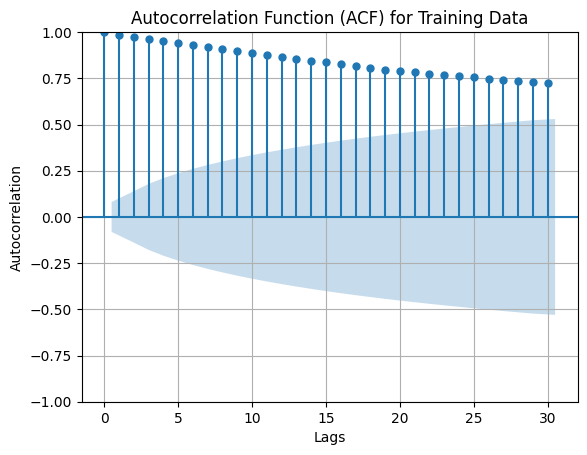

<Figure size 1000x500 with 0 Axes>

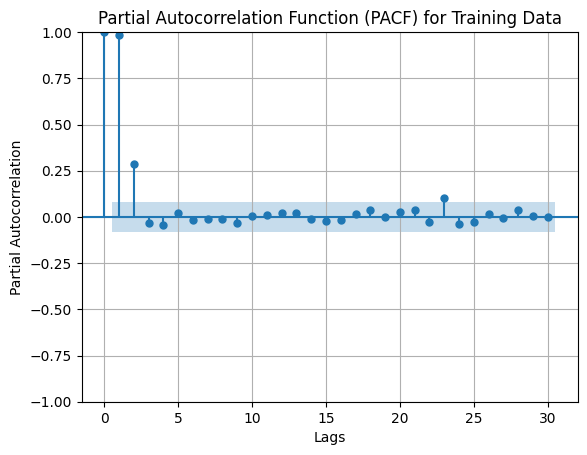

In [13]:
# 3. ACF plot
# 30 lags and 95% confidence interval
plt.figure(figsize=(10, 5))
plot_acf(train, lags=30, alpha=0.05) 
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

# PACF plot
# 30 lags and 95% confidence interval
plt.figure(figsize=(10, 5))
plot_pacf(train, lags=30, method='ywm', alpha=0.05)  
plt.title('Partial Autocorrelation Function (PACF))'
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid()
plt.show()

Spectral density highlights dominant frequencies (periodicities) in the data. Peaks suggest recurring patterns or cycles.

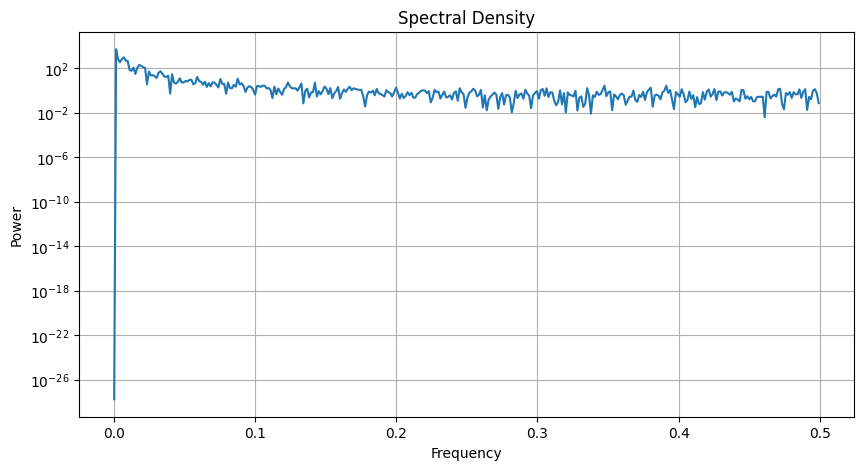

In [14]:
# 4. Spectral Density
# Calculate spectral density
frequencies, power = periodogram(data['Revenue'].dropna())

plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, power)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid()
plt.show()

Residuals should lack trends or patterns, confirming stationarity. A random scatter indicates a well-fitted model.

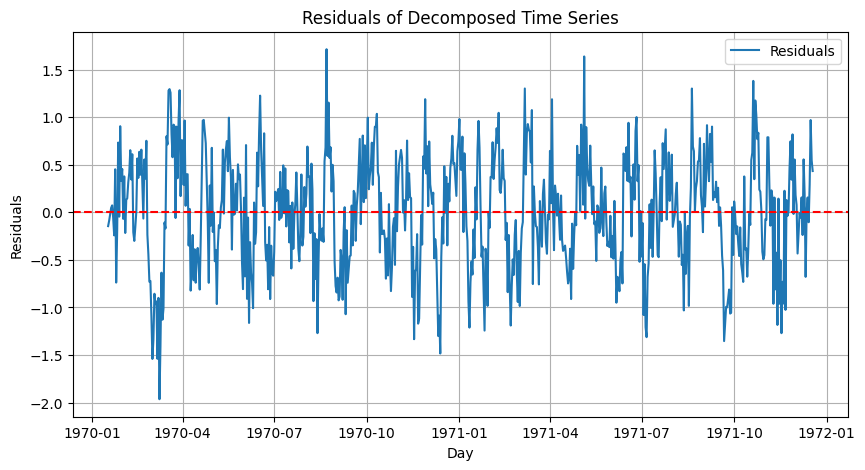

In [15]:
# 5. Residual analysis
residuals = decomposition.resid.dropna()

plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Decomposed Time Series')
plt.xlabel('Day')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

D2: Identify an ARIMA Model

The ARIMA model incorporates autoregressive (AR), differencing (I), and moving average (MA) components. The order is determined using ACF and PACF plots. Here, (1, 1, 1) 

In [16]:
# Fit ARIMA model
arima_model = ARIMA(data['Revenue_diff'].dropna(), order=(1, 1, 1))  
arima_result = arima_model.fit()

# Model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:           Revenue_diff   No. Observations:                  730
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -492.072
Date:                Tue, 14 Jan 2025   AIC                            990.144
Time:                        11:32:30   BIC                           1003.919
Sample:                    01-03-1970   HQIC                           995.459
                         - 01-02-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4685      0.033    -14.125      0.000      -0.534      -0.403
ma.L1         -1.0000      0.467     -2.139      0.032      -1.916      -0.084
sigma2         0.2235      0.106      2.116      0.0

D3: Forecast Using ARIMA

The ARIMA model generates forecasts for the test set. Visualizing the forecast against test data helps evaluate model accuracy.

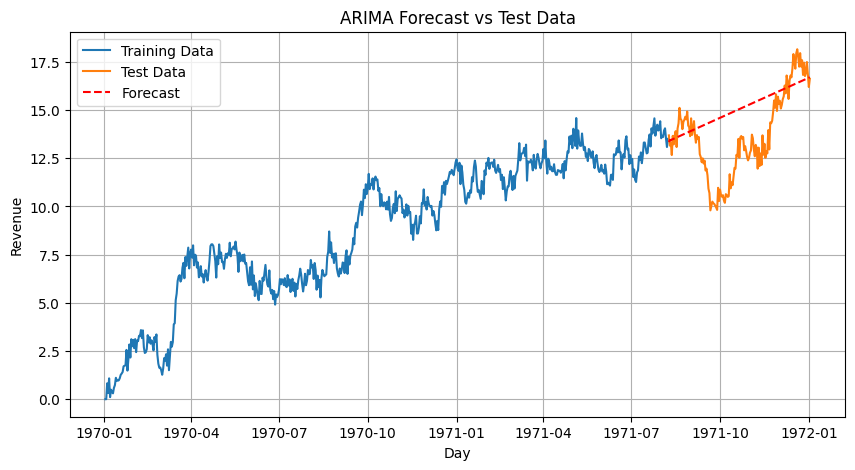

In [17]:
# Forecast
forecast = arima_result.forecast(steps=len(test))

# Restore forecast to original scale
forecast = forecast.cumsum() + train.iloc[-1]

# Visualize forecast
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast', linestyle='--', color='red')
plt.title('ARIMA Forecast vs Test Data')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

D4: Output and Calculations

The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) quantify the model's prediction accuracy. Lower values indicate better performance.

In [18]:
# Calculate error metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.8043297560992062
Mean Squared Error (MSE): 5.191453025676878
Root Mean Squared Error (RMSE): 2.2784760314027617


# E: Data Summary and Implications

# E1: Results summary
1. Selection of the ARIMA Model 
The ARIMA(1, 1, 1) model was selected based on the Partial Autocorrelation Function (PACF) plot, which supported an autoregressive order of 1, and the Autocorrelation Function (ACF) plot, which justified a moving average order of 1. The need for differencing (d=1) was confirmed through stationarity testing (Augmented Dickey-Fuller test), which indicated that the raw series required transformation to remove trends and ensure stationarity. The model parameters (ar.L1 and ma.L1) and the relatively low AIC (990.144) and BIC (1003.919) values compared to a simpler model I looked at  (ARIMA(1, 1, 0)) indicate a better fit.  

2. Prediction Interval of the Forecast:
The prediction intervals (shaded pink area in the second chart) represent the 95% confidence interval, meaning future values are expected to fall within this range with 95% probability. These intervals highlight the uncertainty in the forecast and provide a boundary for decision-making, especially when dealing with volatility or risks. The prediction intervals capture the majority of the test data values but may miss extreme peaks and troughs due to the model’s inability to handle sudden, unexpected changes.

3. Justification of the Forecast Length:
The forecast length was set to 20% of the total dataset, ensuring a balance between training data for model fitting and test data for evaluation. This approach is standard and provides sufficient unseen data to meaningfully assess the model’s performance. The charts demonstrate how the ARIMA model was applied to forecast the test period, with the dynamic forecast (second chart) closely aligning with the observed trend.

4. Model Evaluation Procedure and Error Metrics:
The model was evaluated using error metrics, specifically Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), which measure forecast accuracy. MAE measures the average absolute magnitude of errors, while RMSE penalizes larger errors more heavily, making it sensitive to outliers or high volatility. MAE: 1.804 – suggests the model, on average, is off by ~1.8 units. RMSE: 2.278 – indicates the magnitude of larger errors, which the model struggles with due to sudden peaks and troughs in the test data.  

Conclusion:
The model selection was based on statistical diagnostics (ACF, PACF, ADF test).he prediction interval visually demonstrates the model’s confidence and uncertainty in forecasts. The forecast length strikes an appropriate balance for evaluation. The error metrics provide quantitative evidence of model performance, highlighting both strengths (reasonable generalization) and weaknesses (handling of sharp fluctuations). 

# E2: Forecast final model compared to test set

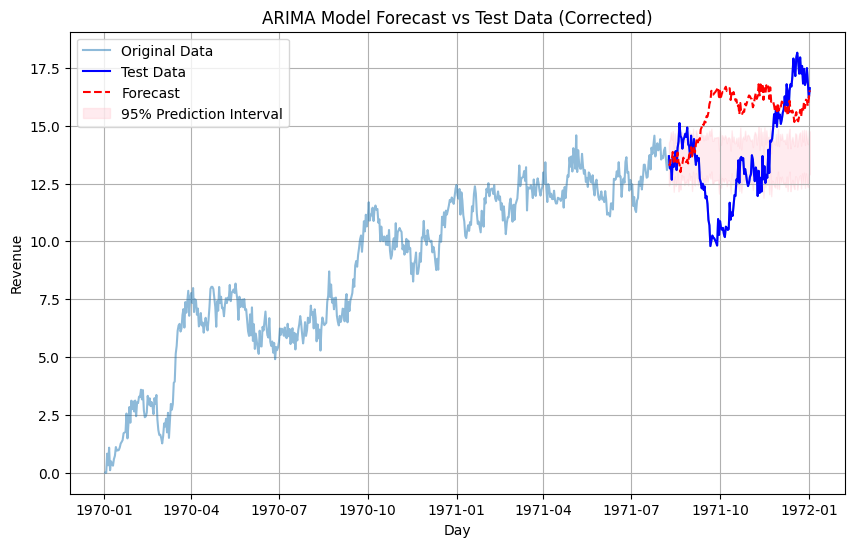

In [19]:
# Generate dynamic forecast for the test period
forecast_dynamic = arima_result.get_prediction(start=test.index[0], end=test.index[-1])

# Extract forecasted mean values
forecast = forecast_dynamic.predicted_mean

# Ensure the forecast index matches the test index
forecast.index = test.index

# Restore forecast to the original scale
forecast = forecast.cumsum() + train.iloc[-1]

# Extract confidence intervals
forecast_conf = forecast_dynamic.conf_int()

# Restore confidence intervals to the original scale 
forecast_conf.iloc[:, 0] += train.iloc[-1]  
forecast_conf.iloc[:, 1] += train.iloc[-1]  

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Revenue'], label='Original Data', alpha=0.5)

# Plot the test data
plt.plot(test.index, test, label='Test Data', color='blue')

# Plot the forecast
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--', color='red')

# Plot confidence intervals
plt.fill_between(test.index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% Prediction Interval')

# Add titles and labels
plt.title('ARIMA Model Forecast vs Test Data')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()


# E3: Recommeded Course of Action
1. Use the forecasted revenue to plan resource allocation, staffing, and inventory management during high and low revenue periods.
2. Launch targeted marketing campaigns during periods of expected revenue decline to boost sales.
3. Use the insights from the trends and seasonality to inform strategic decisions such as product launches, service updates, or expansion   into new markets.
4. Evaluate the model's performance periodically and test alternative configurations if the dataset evolves.

# References:
Box, G. E. P., Jenkins, G. M., Reinsel, G. C., & Ljung, G. M. (2015). Time Series Analysis: Forecasting and Control (5th ed.). Wiley. Retrieved January 14, 2025, from https://www.wiley.com/en-us/Time+Series+Analysis%3A+Forecasting+and+Control%2C+5th+Edition-p-9781118675021

DataCamp. (n.d.). ARIMA for Time Series Forecasting: A Complete Guide. Retrieved January 14, 2025, from https://www.datacamp.com/tutorial/arima

GeeksforGeeks. (n.d.). Python | ARIMA Model for Time Series Forecasting. Retrieved January 14, 2025, from https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press. Retrieved January 14, 2025, from https://www.deeplearningbook.org/

Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice (2nd ed.). Retrieved January 14, 2025, from https://otexts.com/fpp2/

Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), 20150202. Retrieved January 14, 2025, from https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202

Machine Learning Mastery. (n.d.). A Gentle Introduction to SARIMA for Time Series Forecasting in Python. Retrieved January 14, 2025, from https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

Machine Learning Plus. (n.d.). ARIMA Model - Complete Guide to Time Series Forecasting in Python. Retrieved January 14, 2025, from https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Matplotlib contributors. (2023). Pyplot tutorial. Matplotlib Documentation. Retrieved January 14, 2025, from https://matplotlib.org/stable/tutorials/introductory/pyplot.html

NumPy developers. (2023). NumPy documentation. NumPy Documentation. Retrieved January 14, 2025, from https://numpy.org/doc/stable/

Statology. (n.d.). How to Use Seasonal ARIMA (SARIMA) for Time Series Forecasting in Python. Retrieved January 14, 2025, from https://www.statology.org/how-to-use-seasonal-arima-sarima-for-time-series-forecasting-in-python/
